In [1]:
from IPython.display import clear_output

In [2]:
import torch
import torch.nn as nn
from torch.optim import SGD
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
#Loading Data
data = load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
print('feature_names:', data.feature_names)
print('-'*20)
print('target_names:', data.target_names)

feature_names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
--------------------
target_names: ['malignant' 'benign']


In [5]:
# Load the Breast Cancer dataset
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test  = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test  = torch.tensor(y_test, dtype=torch.float32)

In [6]:
print(f'{X.shape=}')
print(f'{y.shape=}')
print('-'*10)
print(f'{X_train.shape=}')
print(f'{X_test.shape=}')
print('-'*10)
print(f'{y_train.shape=}')
print(f'{y_test.shape=}')

X.shape=(569, 30)
y.shape=(569,)
----------
X_train.shape=torch.Size([455, 30])
X_test.shape=torch.Size([114, 30])
----------
y_train.shape=torch.Size([455])
y_test.shape=torch.Size([114])


In [7]:
class LogisticRegression(nn.Module):
  def __init__(self, input_dim):
    super(LogisticRegression, self).__init__()
    self.linear1 = nn.Linear(input_dim, 1)

  def forward(self, x):
    y = self.linear1(x)
    z = torch.sigmoid(y)  # a sigmoid over a linear layer output
    return z

In [8]:
input_dim = X_train.shape[1]
model = LogisticRegression(input_dim)

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy Loss (binary because 2 classes). Cross entropy function in torch is multi-class
optimizer = SGD(model.parameters(), lr=0.01)

num_epochs = 1000

In [9]:
#Train the model
train_losses = []

for epoch in range(num_epochs):
  outputs = model(X_train)
  loss = criterion(outputs, y_train.unsqueeze(dim=-1))

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  train_losses.append(loss.item())

  if (epoch + 1) % 100 == 0:
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.2350
Epoch [200/1000], Loss: 0.1796
Epoch [300/1000], Loss: 0.1525
Epoch [400/1000], Loss: 0.1360
Epoch [500/1000], Loss: 0.1248
Epoch [600/1000], Loss: 0.1166
Epoch [700/1000], Loss: 0.1103
Epoch [800/1000], Loss: 0.1053
Epoch [900/1000], Loss: 0.1011
Epoch [1000/1000], Loss: 0.0977


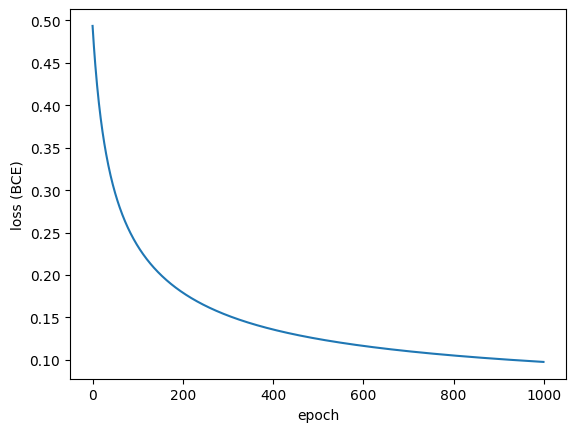

In [10]:
plt.plot(train_losses)
plt.xlabel('epoch')
plt.ylabel('loss (BCE)')
plt.show()

In [11]:
#Accuracy
model.eval()
with torch.no_grad():

  y_pred = model(X_test)
  y_pred = (y_pred > 0.5).float()
  correct = (y_pred == y_test.view(-1, 1)).sum().item()
  accuracy = correct / y_test.size(0)

  print(f'Accuracy on test set: {100 * accuracy:.2f}%')

Accuracy on test set: 95.61%
